# Importing Libraries for RF Optimizer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Importing cleaned sets

In [2]:
path=r"C:\Users\Sam\Desktop\CF\Machine Learning\Part 2\2.2 Complex ML models and Keras part 1\Dataset-weather-prediction-dataset-processed-CLEANED.csv"

In [3]:
weather=pd.read_csv(os.path.join(path))

In [4]:
weather.shape

(22950, 135)

In [5]:
path1=r"C:\Users\Sam\Desktop\CF\Machine Learning\Part 2\2.2 Complex ML models and Keras part 1\Dataset-Answers-Weather_Prediction_Pleasant_Weather-CLEANED.csv"

In [6]:
answers=pd.read_csv(os.path.join(path1))

In [7]:
answers.shape

(22950, 15)

In [8]:
X=weather.values

In [9]:
X=X.reshape(-1,15,9)

In [10]:
# checking for execution
X.shape

(22950, 15, 9)

In [11]:
y=answers.values
# checking for execution
y.shape

(22950, 15)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
# getting train and test shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 15, 9) (18360, 15)
(4590, 15, 9) (4590, 15)


In [14]:
# reshaping X_train
X_train = X_train.reshape(-1,135)
print(X_train.shape)
X_train

(18360, 135)


array([[ 8.    ,  0.79  ,  1.018 , ..., 11.2   ,  8.3   , 12.    ],
       [ 8.    ,  0.76  ,  1.0114, ..., 10.6   ,  5.8   , 15.3   ],
       [ 5.    ,  0.69  ,  1.018 , ...,  5.5   , -0.3   , 11.4   ],
       ...,
       [ 0.    ,  0.65  ,  1.0326, ..., 10.7   ,  7.9   , 13.5   ],
       [ 8.    ,  0.95  ,  1.018 , ...,  7.4   ,  6.9   ,  9.1   ],
       [ 3.    ,  0.69  ,  1.018 , ..., 12.6   , 10.    , 15.2   ]])

In [15]:
# reshaping X_test
X_test = X_test.reshape(-1,135)
print(X_test.shape)
X_test

(4590, 135)


array([[ 0.    ,  0.7   ,  1.022 , ..., 18.8   , 16.7   , 20.8   ],
       [ 5.    ,  0.88  ,  1.0358, ...,  5.2   ,  1.6   ,  8.8   ],
       [ 8.    ,  0.89  ,  1.0157, ..., 13.    ,  7.8   , 18.3   ],
       ...,
       [ 6.    ,  0.8   ,  1.0119, ...,  8.5   ,  6.7   , 10.4   ],
       [ 3.    ,  0.64  ,  1.0203, ..., 14.2   , 12.1   , 16.3   ],
       [ 3.    ,  0.87  ,  1.018 , ..., 14.4   , 12.5   , 16.3   ]])

In [16]:
len(X_train[0])

135

# Grid Search

In [17]:
# creating a RF classifier
clf = RandomForestClassifier()

In [18]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[2,3],
              'min_samples_split':[2,3]
           }

In [20]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Search took 18.775286249319713 minutes


In [21]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.6241285403050109


# Random Search

In [22]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [23]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [24]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 86.90579541921616 minutes


In [25]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 90, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 410}
Best RANDOM search score is: 0.6110021786492376


In [26]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.6241285403050109
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 90, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 410}
Best RANDOM search score is: 0.6110021786492376


In [27]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, criterion = 'entropy')  

clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=7, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=200)

In [28]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6579520697167756


In [29]:
len(clf3.estimators_)

200

In [30]:
y_pred

array([[1, 1, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

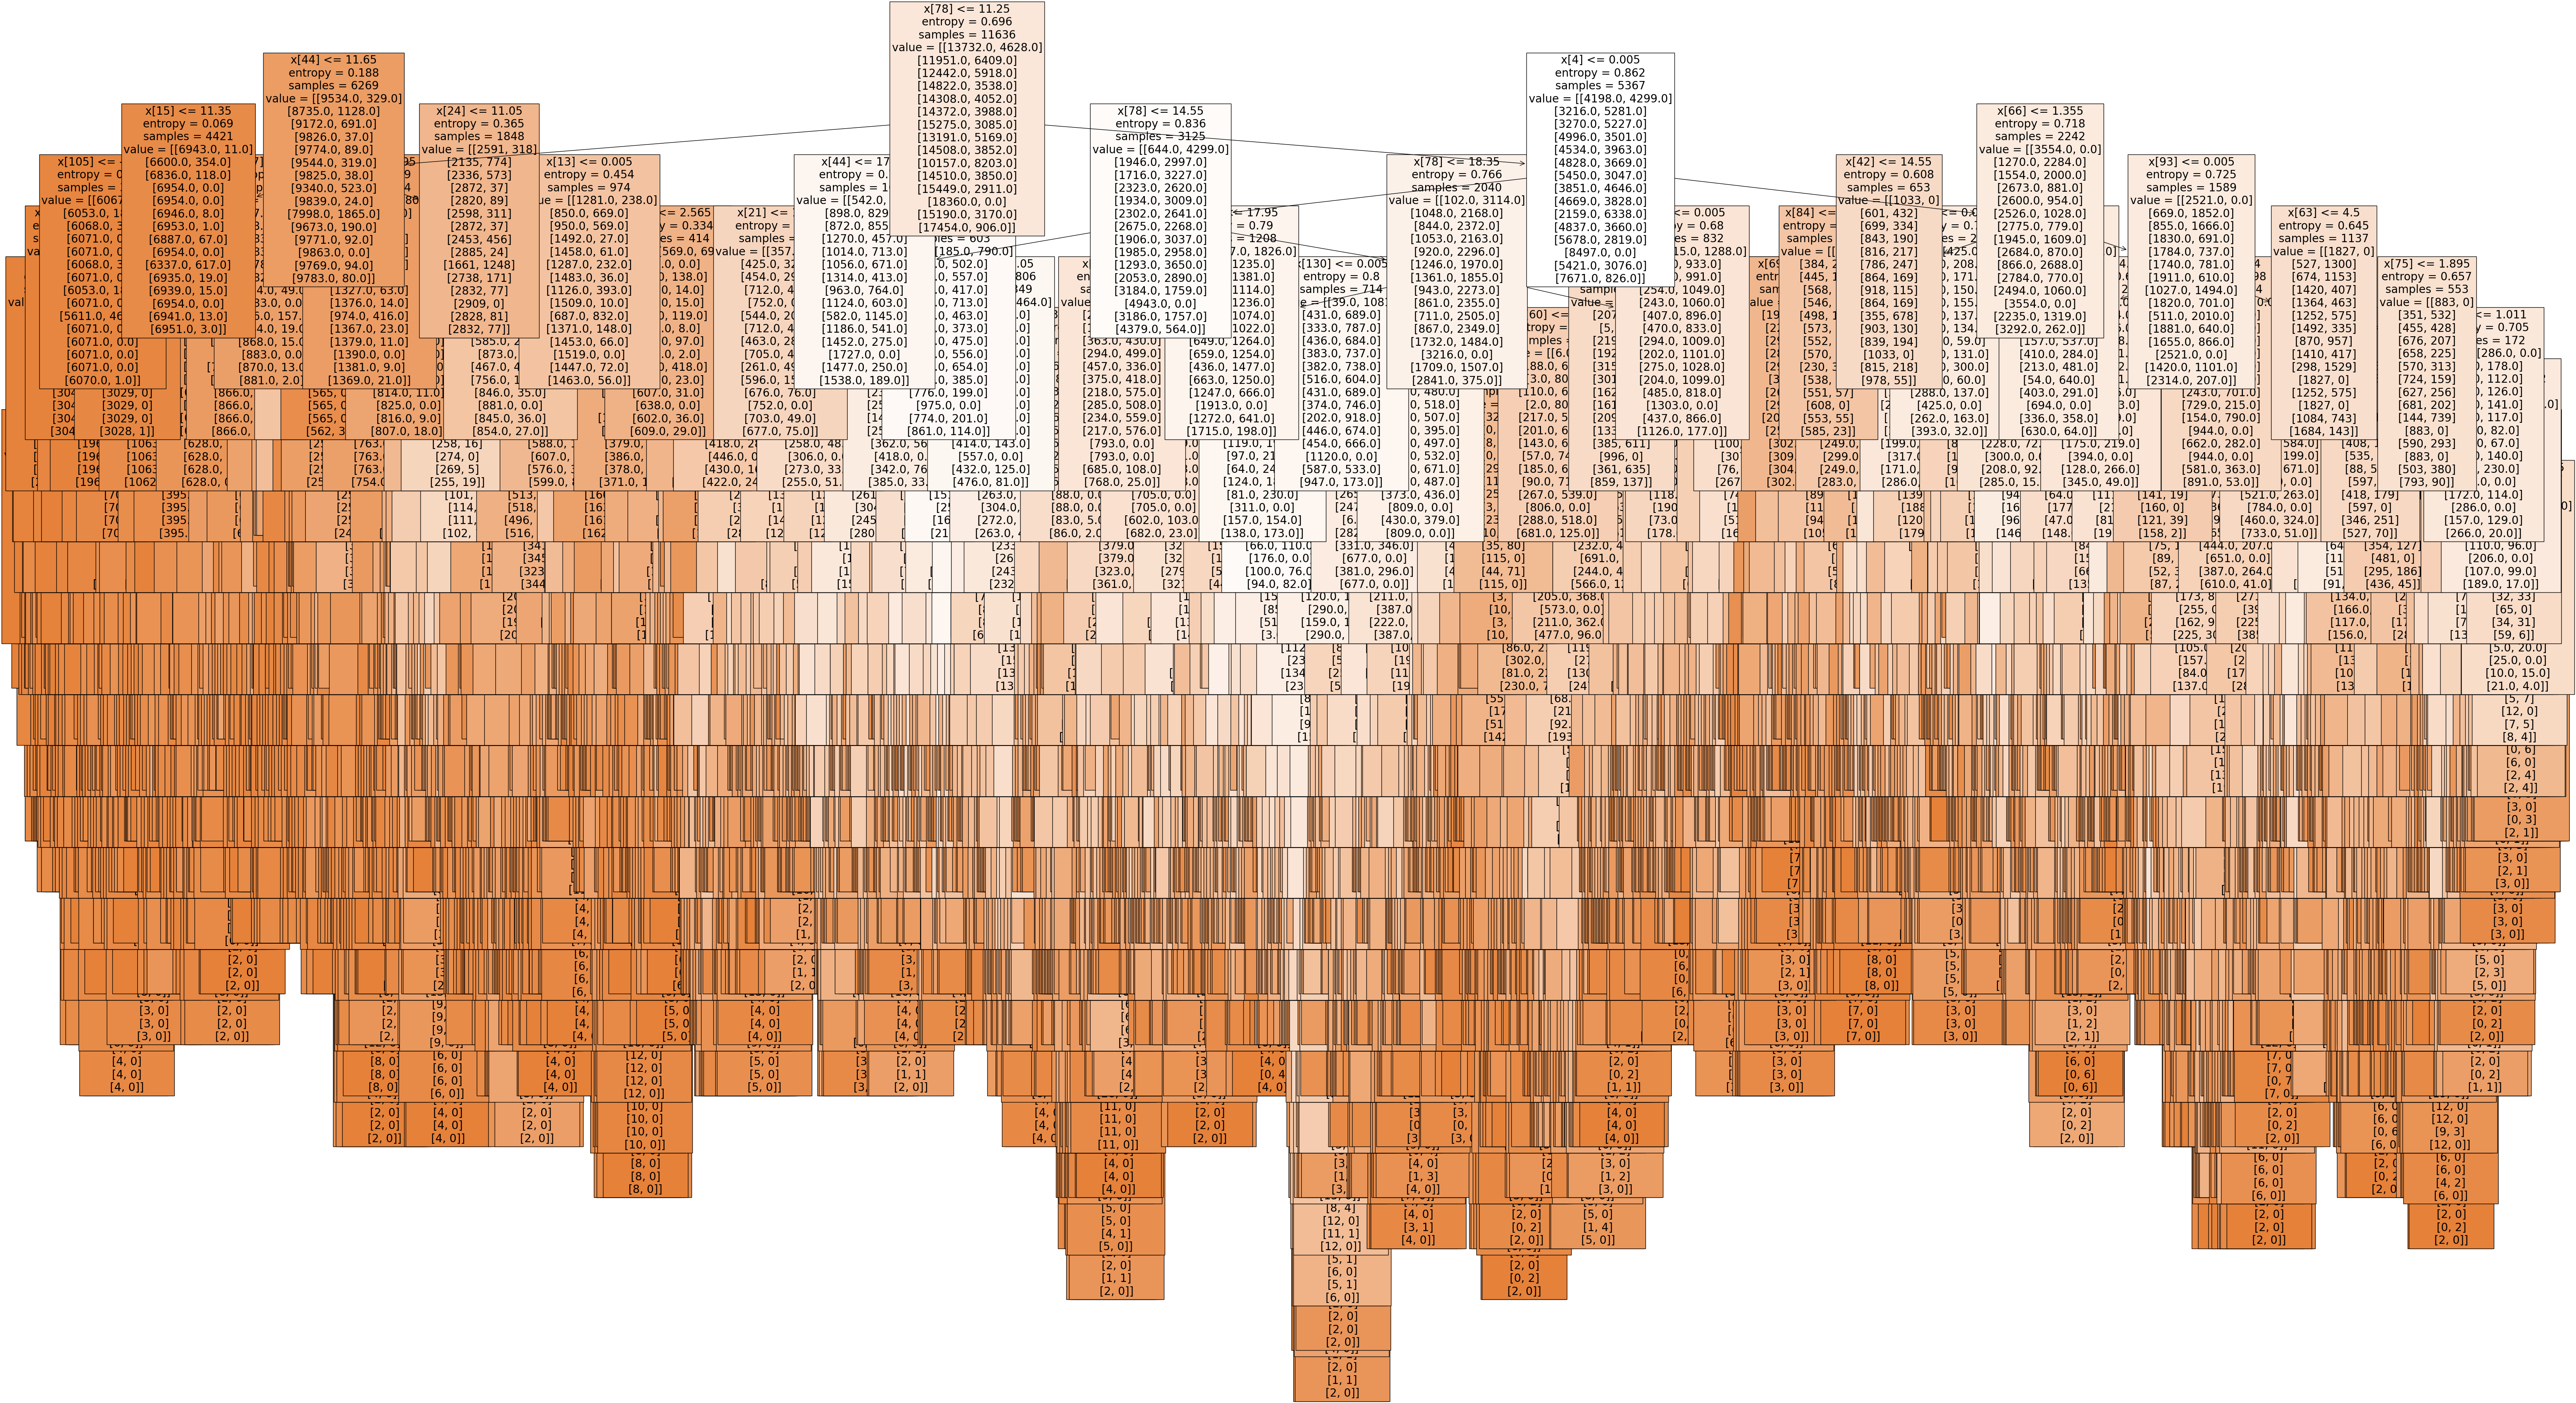

In [32]:
# plotting the forset
ans = ['Unpleasant','Pleasant']
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=ans, filled=True)
plt.show()

# RF for one weather station(VALENTIA)

In [33]:
path2=r"C:\Users\Sam\Desktop\CF\Machine Learning\Part 2\2.3 Complex ML models part 2\Dataset-weather-prediction-dataset-processed-CLEANED-VALENTIA.csv"

In [34]:
valentia=pd.read_csv(os.path.join(path2))

In [35]:
valentia

VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                         5               0.88             1.0003   
1                         7               0.91             1.0007   
2                         7               0.91             1.0096   
3                         7               0.86             1.0184   
4                         3               0.80             1.0328   
...                     ...                ...                ...   
22945                     5               0.82             1.0142   
22946                     5               0.82             1.0142   
22947                     5               0.82             1.0142   
22948                     5               0.82             1.0142   
22949                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                           0.45                    0.34                4.7   
1                           0.25                    0.84                0.7   
2                           0.17                    0.08                0.1   
3                           0.13                    0.98                0.0   
4                           0.46                    0.00                5.7   
...                          ...                     ...                ...   
22945                       1.13                    0.41                3.4   
22946                       1.13                    0.41                3.4   
22947                       1.13                    0.41                3.4   
22948                       1.13                    0.41                3.4   
22949                       1.13                    0.41                3.4   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                     8.5                6.0               10.9  
1                     8.9                5.6               12.1  
2                    10.5                8.1               12.9  
3                     7.4                7.3               10.6  
4                     5.7                3.0                8.4  
...                   ...                ...                ...  
22945                10.7                7.9               13.5  
22946                10.7                7.9               13.5  
22947                10.7                7.9               13.5  
22948                10.7                7.9               13.5  
22949                10.7                7.9               13.5  

[22950 rows x 9 columns]

In [36]:
valentia.shape

(22950, 9)

In [37]:
XVA=valentia.values

In [38]:
XVA_train, XVA_test, y_train, y_test = train_test_split(XVA,y,test_size=0.2)

In [39]:
print(XVA_train.shape, y_train.shape)
print(XVA_test.shape, y_test.shape)

(18360, 9) (18360, 15)
(4590, 9) (4590, 15)


In [54]:
# creating a RF classifier for VALENTIA
clf4 = RandomForestClassifier()
# Grid search
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[2,3],
              'min_samples_split':[2,3]
           }

In [55]:
start = time.time()
grid = GridSearchCV(clf4,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(XVA_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Search took 14.102275085449218 minutes


In [56]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.4011982570806101


# Important Variables Valentia

In [57]:
clf4.fit(XVA_train, y_train)

np.set_printoptions(threshold=np.inf)
newarray = clf4.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.03471402, 0.07199453, 0.09722056, 0.20042881, 0.06722469,
       0.07880267, 0.14837889, 0.10332426, 0.19791156])

In [58]:
np.set_printoptions(threshold=1000)

In [59]:
newarray = newarray.reshape(-1,9)
print(newarray.shape)
newarray

(1, 9)


array([[0.03471402, 0.07199453, 0.09722056, 0.20042881, 0.06722469,
        0.07880267, 0.14837889, 0.10332426, 0.19791156]])

In [62]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

1.0

In [63]:
important = pd.Series(clf4.feature_importances_, index=valentia.columns)
important

VALENTIA_cloud_cover         0.034714
VALENTIA_humidity            0.071995
VALENTIA_pressure            0.097221
VALENTIA_global_radiation    0.200429
VALENTIA_precipitation       0.067225
VALENTIA_sunshine            0.078803
VALENTIA_temp_mean           0.148379
VALENTIA_temp_min            0.103324
VALENTIA_temp_max            0.197912
dtype: float64

VALENTIA_cloud_cover         0.034714
VALENTIA_humidity            0.071995
VALENTIA_pressure            0.097221
VALENTIA_global_radiation    0.200429
VALENTIA_precipitation       0.067225
VALENTIA_sunshine            0.078803
VALENTIA_temp_mean           0.148379
VALENTIA_temp_min            0.103324
VALENTIA_temp_max            0.197912
dtype: float64


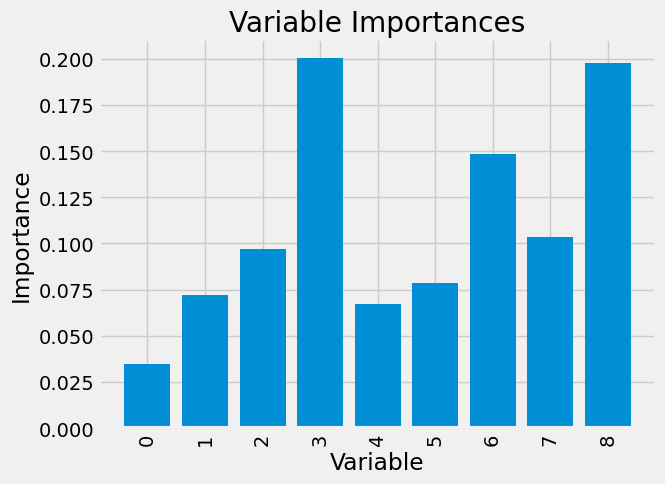

In [67]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
pd.set_option('display.max_rows', None)
print(important)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');